<a href="https://colab.research.google.com/github/lilyknightP/Python_project/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

number of classes:  4  sigma for data scatter: 1.0
generating training data
400 data points generated. Seed is random.


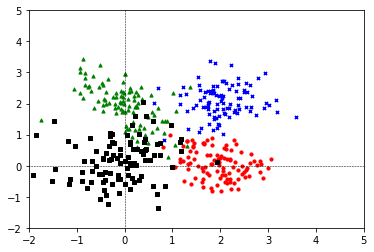

generating test data
100 data points generated. Seed is random.
training softmax classifier...
testing softmax classifier...
accuracy of softmax loss:  94.0 %


In [6]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy.special as sp 
import time
from scipy.optimize import minimize
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn.neighbors import KNeighborsClassifier 

import data_generator as dg

# you can define/use whatever functions to implememt

########################################
# Part 1. cross entropy loss
########################################
def cross_entropy_softmax_loss(Wb, x, y, num_class, n, feat_dim):
    # implement your function here
    # return cross entropy loss

    cross_entropy_loss = 0.0
    loss = 0.0

    Wb = np.reshape(Wb, (-1, 1))
    b = Wb[-num_class:]
    W = np.reshape(Wb[range(num_class * feat_dim)], (num_class, feat_dim))
    x=np.reshape(x.T, (-1, n))
    s=W@x+b

    def softmax(x) :
      e_x = np.exp(x - np.max(x))
      return e_x / e_x.sum(axis=0)
    
    def loss_cal(prob, y) :
      return - np.log(prob[y])

    for i in range(n) :
      score = s.T[i]
      un_prob = softmax(score)
      loss = loss_cal(un_prob, y[i])

      if(loss > 0) :
        cross_entropy_loss += loss

    return cross_entropy_loss / n

########################################
# Part 2. SVM loss calculation
########################################
def svm_loss(Wb, x, y, num_class, n, feat_dim):
    # implement your function here
    # return SVM loss
    pass

    loss = 0.0

    Wb = np.reshape(Wb, (-1, 1))
    b = Wb[-num_class:]
    W = np.reshape(Wb[range(num_class * feat_dim)], (num_class, feat_dim))
    x=np.reshape(x.T, (-1, n))
    s=W@x+b 

    for i in range(n) :
      score = s.T[i]
      correct_score = score[y[i]]

      for j in range(num_class) :
        if score[j] == correct_score :
          continue
        margin = np.max(score[j] - correct_score + 1)

        if(margin > 0) : 
          loss += margin

    return loss / n

########################################
# Part 3. kNN classification
########################################
def knn_test(X_train, y_train, X_test, y_test, n_train_sample, n_test_sample, k):
    # implement your function here
    # return accuracy
    pass
 
    accuracy = 0.0

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) 
    neigh.predict(X_test)

    accuracy = neigh.score(X_test,y_test)

    return accuracy

# now lets test the model for linear models, that is, SVM and softmax
def linear_classifier_test(Wb, x_te, y_te, num_class,n_test):
    Wb = np.reshape(Wb, (-1, 1))
    dlen = len(x_te[0])
    b = Wb[-num_class:]
    W = np.reshape(Wb[range(num_class * dlen)], (num_class, dlen))
    accuracy = 0;

    for i in range(n_test):
        # find the linear scores
        s = W @ x_te[i].reshape((-1, 1)) + b
        # find the maximum score index
        res = np.argmax(s)
        accuracy = accuracy + (res == y_te[i]).astype('uint8')

    return accuracy / n_test

# number of classes: this can be either 3 or 4
num_class = 4

# sigma controls the degree of data scattering. Larger sigma gives larger scatter
# default is 1.0. Accuracy becomes lower with larger sigma
sigma = 1.0

print('number of classes: ',num_class,' sigma for data scatter:',sigma)
if num_class == 4:
    n_train = 400
    n_test = 100
    feat_dim = 2
else:  # then 3
    n_train = 300
    n_test = 60
    feat_dim = 2

# generate train dataset
print('generating training data')
x_train, y_train = dg.generate(number=n_train, seed=None, plot=True, num_class=num_class, sigma=sigma)

# generate test dataset
print('generating test data')
x_test, y_test = dg.generate(number=n_test, seed=None, plot=False, num_class=num_class, sigma=sigma)

# set classifiers to 'svm' to test SVM classifier
# set classifiers to 'softmax' to test softmax classifier
# set classifiers to 'knn' to test kNN classifier
classifiers = 'softmax'

if classifiers == 'svm':
    print('training SVM classifier...')
    w0 = np.random.normal(0, 1, (2 * num_class + num_class))
    result = minimize(svm_loss, w0, args=(x_train, y_train, num_class, n_train, feat_dim))
    print('testing SVM classifier...')

    Wb = result.x
    print('accuracy of SVM loss: ', linear_classifier_test(Wb, x_test, y_test, num_class,n_test)*100,'%')

elif classifiers == 'softmax':
    print('training softmax classifier...')
    w0 = np.random.normal(0, 1, (2 * num_class + num_class))
    result = minimize(cross_entropy_softmax_loss, w0, args=(x_train, y_train, num_class, n_train, feat_dim))

    print('testing softmax classifier...')

    Wb = result.x
    print('accuracy of softmax loss: ', linear_classifier_test(Wb, x_test, y_test, num_class,n_test)*100,'%')

else:  # knn
    # k value for kNN classifier. k can be either 1 or 3.
    k = 3
    print('testing kNN classifier...')
    print('accuracy of kNN loss: ', knn_test(x_train, y_train, x_test, y_test, n_train, n_test, k)*100
          , '% for k value of ', k)
